In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pad images from 28x28 to 32x32 (LeNet-5 expects 32x32)
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), 'constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), 'constant')

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape to add channel dimension
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 21s 2us/step
Training shape: (60000, 32, 32, 1), Test shape: (10000, 32, 32, 1)


In [5]:
def build_lenet5(input_shape=(32, 32, 1), num_classes=10):
    model = models.Sequential(name='LeNet-5_Custom')

    # C1: Convolutional layer (6 filters, 5x5 kernel)
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # C2: Convolutional layer (16 filters, 5x5 kernel)
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # C3: Convolutional layer (120 filters, 5x5 kernel)
    model.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'))

    # Flatten before Fully Connected Layers
    model.add(layers.Flatten())

    # F4: Fully connected layer (84 units)
    model.add(layers.Dense(units=84, activation='tanh'))

    # F5: Output layer (10 classes)
    model.add(layers.Dense(units=num_classes, activation='softmax'))

    return model

# Instantiate model
model = build_lenet5()
model.summary()

d:\AAIT\DL - Architectures\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "LeNet-5_Custom"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
375/375 - 4s - 10ms/step - accuracy: 0.8953 - loss: 0.3690 - val_accuracy: 0.9456 - val_loss: 0.1836
Epoch 2/10
375/375 - 2s - 7ms/step - accuracy: 0.9567 - loss: 0.1440 - val_accuracy: 0.9678 - val_loss: 0.1114
Epoch 3/10
375/375 - 3s - 7ms/step - accuracy: 0.9713 - loss: 0.0923 - val_accuracy: 0.9734 - val_loss: 0.0840
Epoch 4/10
375/375 - 2s - 6ms/step - accuracy: 0.9784 - loss: 0.0698 - val_accuracy: 0.9757 - val_loss: 0.0809
Epoch 5/10
375/375 - 2s - 6ms/step - accuracy: 0.9832 - loss: 0.0541 - val_accuracy: 0.9789 - val_loss: 0.0700
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0.9818 - val_loss: 0.0590
Epoch 7/10
375/375 - 3s - 7ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9829 - val_loss: 0.0549
Epoch 8/10
375/375 - 3s - 7ms/step - accuracy: 0.9900 - loss: 0.0313 - val_accuracy: 0.9833 - val_loss: 0.0564
Epoch 9/10
375/375 - 3s - 8ms/step - accuracy: 0.9930 - loss: 0.0252 - val_accuracy: 0.9832 - val_loss: 0.0550


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0425
Test accuracy: 0.9872


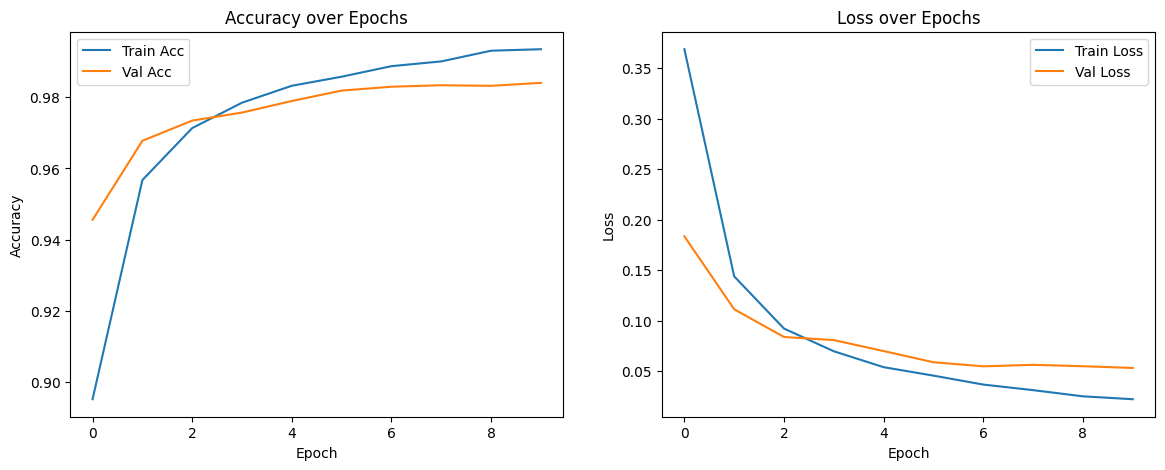

In [9]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


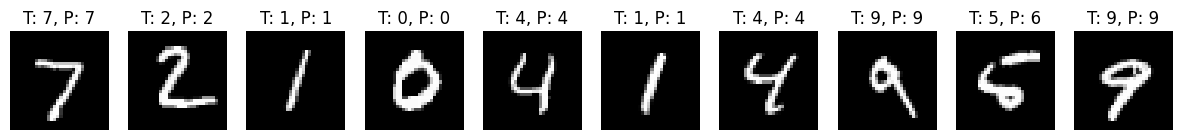

In [ ]:
def plot_predictions(model, x_data, y_true, n=10):
    preds = model.predict(x_data[:n])
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(y_true[:n], axis=1)

    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(x_data[i].reshape(32, 32), cmap='gray')
        plt.title(f"T: {true_classes[i]}, P: {pred_classes[i]}")
        plt.axis('off')
    plt.show()

plot_predictions(model, x_test, y_test)
